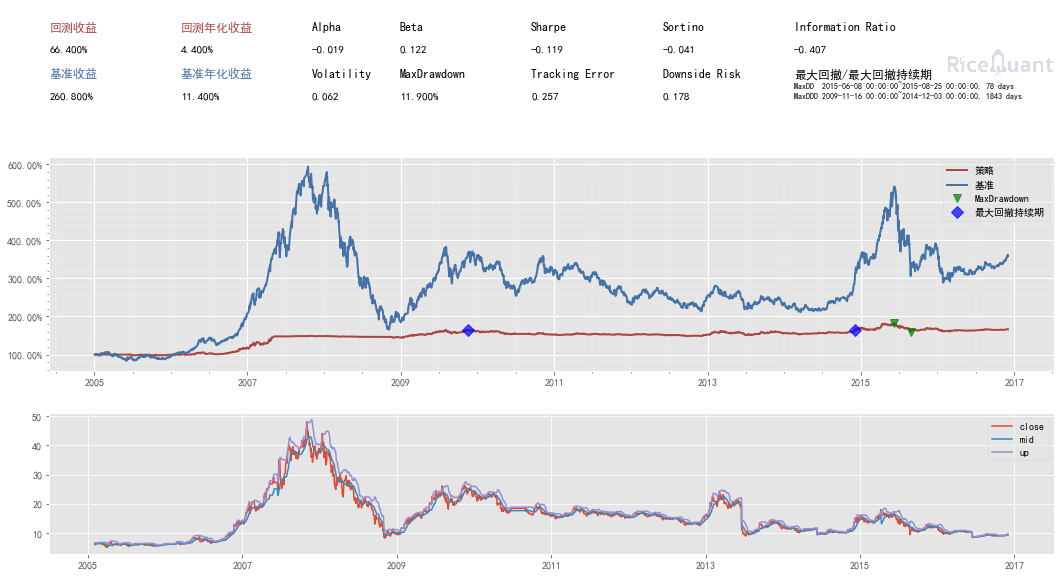

{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2005-01-04  738.21      99261.79                  1.000    100000.00   
  2005-01-05  738.21     100248.56                  1.000    100986.77   
  2005-01-06  738.21      99300.17                  1.010    100038.38   
  2005-01-07  738.21      99379.96                  1.000    100118.17   
  2005-01-10  738.21     100381.88                  1.001    101120.09   
  2005-01-11  738.21     100711.14                  1.011    101449.35   
  2005-01-12  738.21     100671.75                  1.014    101409.96   
  2005-01-13  738.21     100684.88                  1.014    101423.09   
  2005-01-14  738.21      99819.31                  1.014    100557.52   
  2005-01-17  738.21      97712.45                  1.006     98450.66   
  2005-01-18  738.21      98443.69                  0.985     99181.90   

In [5]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import rqalpha
from rqalpha.api import *
import talib as ta

def init(context):
    update_universe('000001.XSHE')
    context.s1 = "000001.XSHE"
    context.PERIOD = 20
    context.stoplossmultipler= 0.6 #止损 乘数
    context.takepofitmultipler= 4 #止盈 乘数


def handle_bar(context, bar_dict):
    entry_exit(context, bar_dict)
    stop_loss(context, bar_dict)


def stop_loss(context,bar_dict):
    for stock in context.portfolio.positions:
        if bar_dict[stock].last<context.portfolio.positions[stock].avg_price*context.stoplossmultipler:# 现价低于 原价一定比例
            order_target_percent(stock,0)
        elif bar_dict[stock].last>context.portfolio.positions[stock].avg_price*context.takepofitmultipler:# 现价高于原价一定比例
            order_target_percent(stock,0)


def entry_exit(context, bar_dict):
    prices = history_bars(context.s1, context.PERIOD+2, '1d', 'close')
    if len(prices) > 20:
        upperband, middleband, lowerband = ta.BBANDS(prices, context.PERIOD)
        MOM = ta.ROCR100(prices, context.PERIOD)
        plot("up", upperband[-2])
        plot("mid", middleband[-2])
        plot('close', prices[-2])

        cur_position = context.portfolio.positions[context.s1].quantity
        shares = context.portfolio.cash/bar_dict[context.s1].close

        if bar_dict[context.s1].last < middleband[-1] and prices[-2] > middleband[-2] and cur_position > 0:
            order_shares(context.s1, 0)
        if bar_dict[context.s1].last > upperband[-1] and prices[-2] < upperband[-2] and cur_position == 0:
            order_target_value(context.s1, shares)

"""

config = {
  "base": {
    "start_date": "2000-06-01",
    "end_date": "2016-12-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

# 您可以指定您要传递的参数
run_code(code, config)